## Simulation generator for XClone

In [1]:
import numpy as np
from scipy.sparse import load_npz

In [2]:
dat_dir = "/hps/nobackup2/stegle/users/huangh/cloneID/"

### Load G&T data

In [3]:
AD_RNA = load_npz(dat_dir + "/G_T/scRNA/block_AD.npz").toarray()
DP_RNA = load_npz(dat_dir + "/G_T/scRNA/block_DP.npz").toarray()

AD_DNA = load_npz(dat_dir + "/G_T/scDNA/block_AD.npz").toarray()
DP_DNA = load_npz(dat_dir + "/G_T/scDNA/block_DP.npz").toarray()

In [4]:
DP_DNA

array([[188., 346., 181., ...,  37.,  66.,  58.],
       [ 43.,  75.,  67., ...,  17.,  32.,  22.],
       [  1.,   3.,  nan, ...,   2.,  nan,  nan],
       ...,
       [ 15.,  10.,  18., ...,   2.,  11.,   6.],
       [  5.,   4.,   5., ...,   1.,  nan,  nan],
       [ 75.,  87., 149., ...,  28.,  39.,  16.]])

In [5]:
AD_RNA[AD_RNA != AD_RNA] = 0
DP_RNA[DP_RNA != DP_RNA] = 0
AD_DNA[AD_DNA != AD_DNA] = 0
DP_DNA[DP_DNA != DP_DNA] = 0
# AD_RNA[(AD_RNA>0) == False] = 0

In [6]:
np.mean(AD_RNA > DP_RNA), np.mean(AD_DNA > DP_DNA)

(0.0, 0.0)

In [7]:
import pickle

pickle_in = open(dat_dir + "/G_T/scDNA/CNV_prime.pkl", "rb")
CNV_prime = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open(dat_dir + "/G_T/scDNA/I_G_prime.pkl", "rb")
I_G_prime = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open(dat_dir + "/G_T/scDNA/tau.pkl", "rb")
tau_val = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open(dat_dir + "/G_T/scDNA/T.pkl", "rb")
T_val = pickle.load(pickle_in)
pickle_in.close()

In [8]:
I_G_prime

array([4, 0, 0, 1, 4, 2, 8, 0, 4, 7, 1, 0, 1, 4, 1, 0, 1, 0, 7, 5, 8, 8,
       0, 5, 5, 6, 7, 6, 1, 5, 4, 0, 7, 3, 2, 6, 0, 2, 3, 5, 0, 1, 1, 4,
       1, 7, 0, 1, 7, 5, 2, 3, 6, 4, 5, 5, 2, 6, 0, 8, 2, 6, 3, 2, 2, 6,
       4, 7, 3, 2, 3, 4, 1, 0, 2, 0, 4, 1, 3, 1, 6, 6, 2, 5, 8, 3, 3, 3,
       2])

In [9]:
tau_val.transpose()

array([[1, 0, 2, 1, 0, 3, 2, 1, 0, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0],
       [0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5]])

In [10]:
T_val.shape

(10152, 9)

In [11]:
T_val

array([[ 3.,  3.,  3., ...,  0.,  3.,  3.],
       [ 3.,  3.,  3., ...,  0.,  3.,  3.],
       [ 3.,  3.,  3., ...,  0.,  3.,  4.],
       ...,
       [ 3.,  3.,  3., ..., nan,  3.,  3.],
       [ 3.,  3.,  3., ..., nan,  3.,  3.],
       [ 3.,  3.,  3., ..., nan,  3.,  3.]])

In [12]:
np.unique(T_val[T_val >= 0])

/nfs/software/stegle/users/huangh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 16., 17.])

In [13]:
np.sum(np.sum(T_val == 0, axis=1) > 0)

4807

In [14]:
np.sum(T_val == 0, axis=0)

array([1516, 1298, 1435, 1183, 1241, 1356, 2245, 1435, 1246])

In [15]:
np.random.beta(a=np.array([1,2,3,4])*100, b=np.array([2,4,2,1])*100)

array([0.33334473, 0.33341132, 0.60277258, 0.78631928])

In [26]:
import vireoSNP
from scipy import sparse

idx = (np.sum(T_val == 0, axis=1) == 0) * (np.sum(T_val == T_val, axis=1) == T_val.shape[1])
print(sum(idx))

theta_prior = np.array([[0.01, 1], [1, 2], [1, 1], [2, 1], [1, 0.01]])

AD = sparse.csr_matrix(np.append(AD_RNA, AD_DNA, axis=1))[idx, :]#[:100, :]
DP = sparse.csr_matrix(np.append(DP_RNA, DP_DNA, axis=1))[idx, :]#[:100, :]

# res = vireoSNP.vireo_core(AD, DP, n_donor=4, learn_GT=True,
#                           theta_prior=theta_prior, learn_theta=True, 
#                           check_doublet=False)

res = vireoSNP.vireo_flock(AD, DP, n_donor=4, learn_GT=True,
                           n_extra_donor=0, #ASE_mode=True,
                           theta_prior=theta_prior, learn_theta=True, 
                           n_init=50, check_doublet=False, random_seed=1)

1424
[vireo] warm-up: 50 random initializations for 4 clusters...
donor2	donor1	donor3	donor0
112	15	30	21
[vireo] warm-up: lower bound ranges [-4304136.1, -4293396.6, -4287022.7]
[vireo] main RUN with warm initials and tuned GT ...
[vireo] main RUN: 26 iterations; lower bound -4286930.1
[vireo] beta parameters for binomial rate:
[[3327.0 67696.3]
 [32523.3 85674.5]
 [2903939.4 2780829.6]
 [251683.6 131071.2]
 [98403.8 7076.3]]


In [27]:
print(AD.shape)
print(np.sum(AD < 0), np.sum(DP < 0), np.mean(AD > DP))

(1424, 178)
0 0 0.0


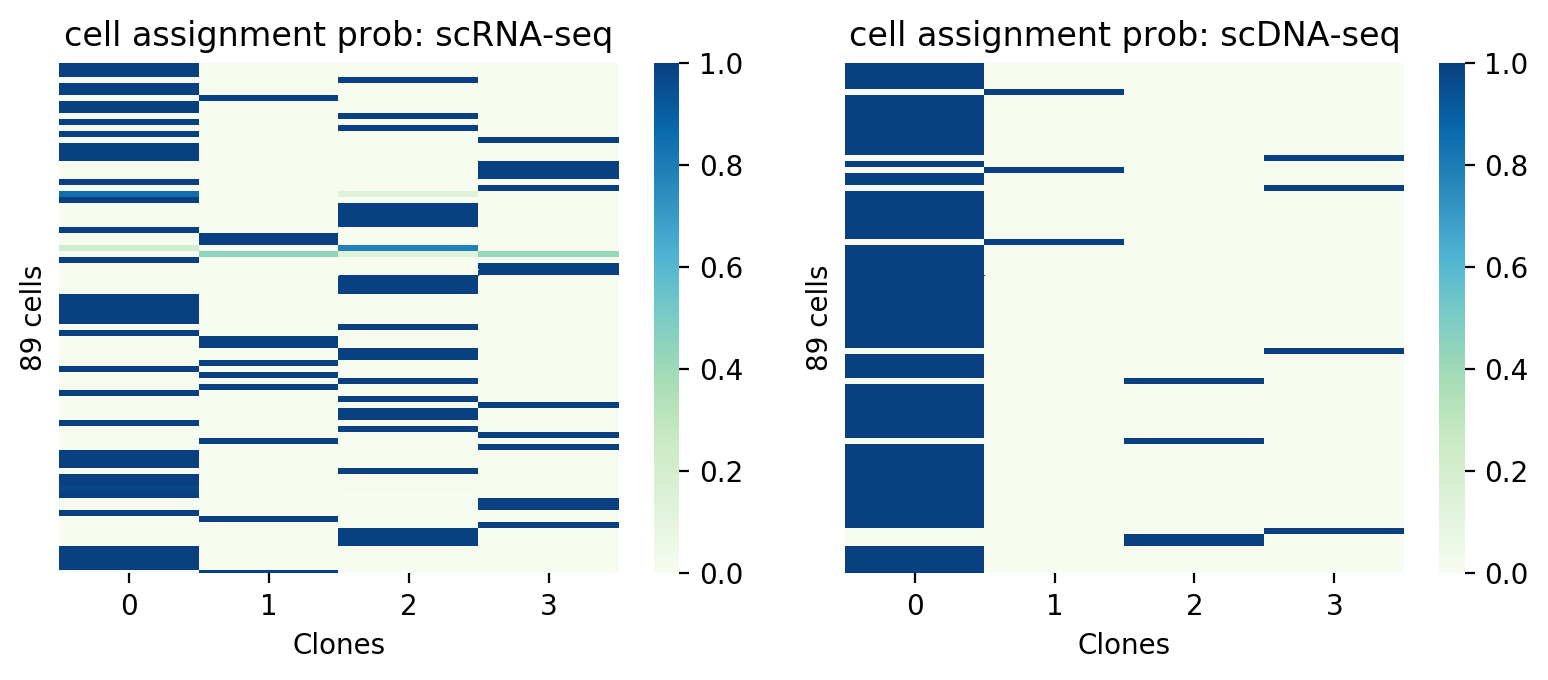

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3.5), dpi=200)
plt.subplot(1,2,1)
im = sns.heatmap(res['ID_prob'][:89, :], cmap="GnBu")
plt.title("cell assignment prob: scRNA-seq")
plt.xlabel("Clones")
plt.ylabel("89 cells")
plt.yticks([])

plt.subplot(1,2,2)
im = sns.heatmap(res['ID_prob'][89:, :], cmap="GnBu")
plt.xlabel("Clones")
plt.title("cell assignment prob: scDNA-seq")
plt.ylabel("89 cells")
plt.yticks([])

plt.tight_layout()
plt.show()

In [29]:
res['theta_shapes'][:, 0] / res['theta_shapes'].sum(axis=1)

array([0.0, 0.3, 0.5, 0.7, 0.9])

In [30]:
_theta = res['theta_shapes'][:, 0] / res['theta_shapes'].sum(axis=1)
_theta_clone = np.tensordot(res['GT_prob'], _theta, axes=[1,0])

[Text(183.55629139072846, 0.5, 'CNV blocks'),
 Text(0.5, 68.99999999999991, 'infered clones'),
 Text(0.5, 1, 'Inferred allele ratio')]

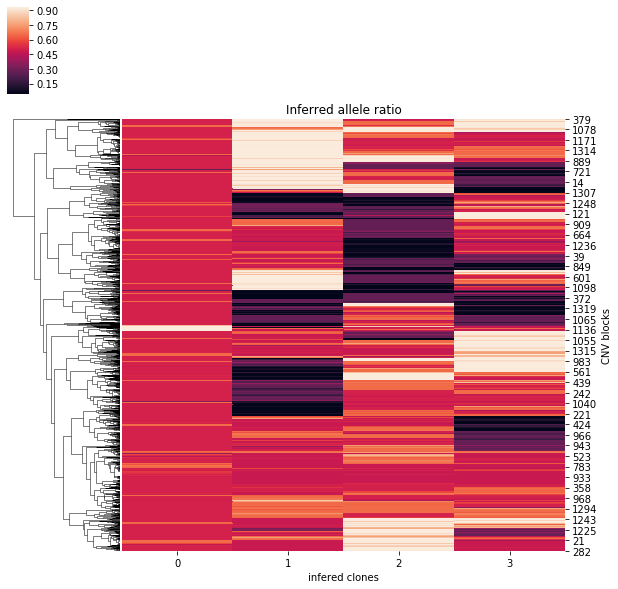

In [32]:
im = sns.clustermap(_theta_clone, col_cluster=False)
im.ax_heatmap.set(xlabel='infered clones', 
                  ylabel='CNV blocks',
                  title='Inferred allele ratio')